<h3>Preprocessing</h3>

In [176]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [177]:
celestial_data = pd.read_csv('data/star_classification.csv')
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [178]:
celestial_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [179]:
celestial_data.drop(columns = ['rerun_ID'], inplace = True)

In [180]:
celestial_data.isnull().any()

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [181]:
celestial_data = celestial_data[celestial_data['class'] != 'QSO']
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [182]:
celestial_data['class'].unique()

array(['GALAXY', 'STAR'], dtype=object)

In [183]:
celestial_data.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [184]:
celestial_data['class'] = celestial_data['class'].map({'GALAXY': 0, 'STAR': 1})
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [185]:
print(f'Galaxy count: {celestial_data["class"].value_counts()[0]} galaxies')
print(f'Star count: {celestial_data["class"].value_counts()[1]} stars')

Galaxy count: 59445 galaxies
Star count: 21594 stars


In [186]:
indices = celestial_data[celestial_data['class'] == 0].index
drop = np.random.choice(indices, 60000)
celestial_data.drop(drop, inplace = True)

print(f'Galaxy count: {celestial_data["class"].value_counts()[0]} galaxies')
print(f'Star count: {celestial_data["class"].value_counts()[1]} stars')

Galaxy count: 21633 galaxies
Star count: 21594 stars


<h3>Visualizations</h3>

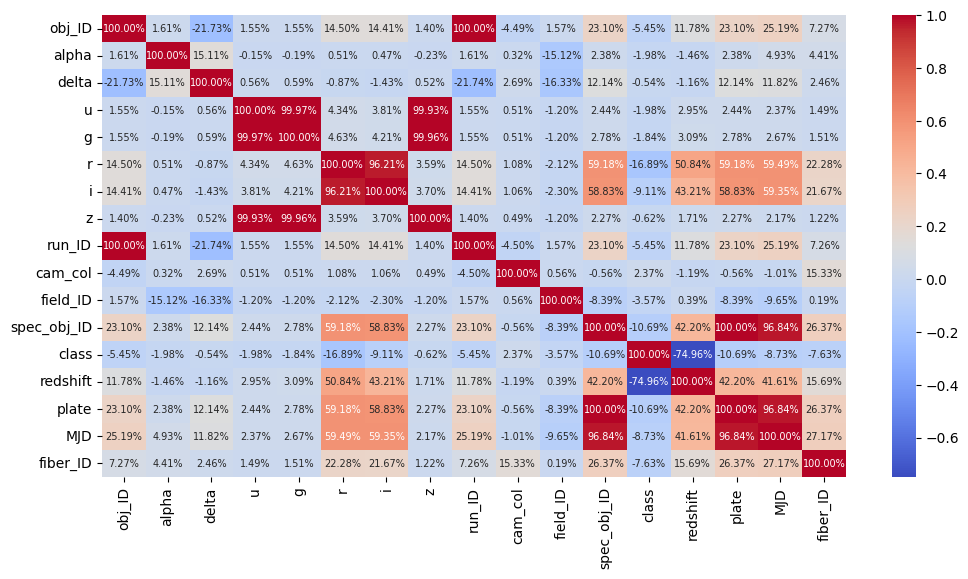

In [187]:
plt.figure(figsize = (12, 6))
sb.heatmap(data = celestial_data.corr(), annot = True, fmt = '.2%', annot_kws = {'size': 7}, cmap = 'coolwarm')
plt.show()

<h3>Modeling</h3>

In [188]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Current running model: GaussianNB()
Score: 0.558434348107708
Cross Validation Scores: [0.55146889 0.56534814 0.54493927 0.55777906 0.573048  ]
Confusion Matrix:


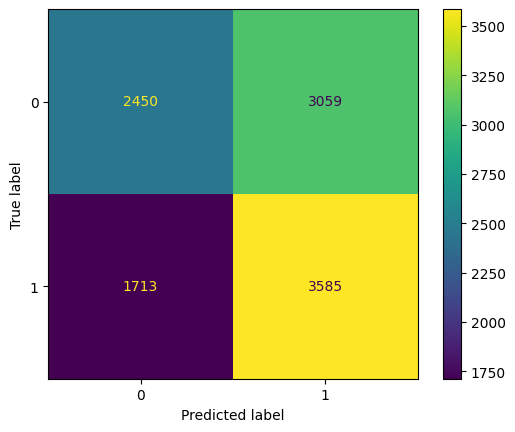

Classification Report:
              precision    recall  f1-score   support

      Galaxy       0.59      0.44      0.51      5509
        Star       0.54      0.68      0.60      5298

    accuracy                           0.56     10807
   macro avg       0.56      0.56      0.55     10807
weighted avg       0.56      0.56      0.55     10807

----------------------
Current running model: DecisionTreeClassifier()
Score: 0.9981493476450449
Cross Validation Scores: [0.99791811 0.99780245 0.99849624 0.99826489 0.9978022 ]
Confusion Matrix:


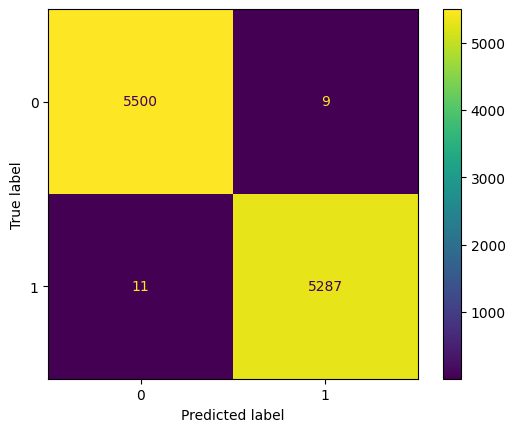

Classification Report:
              precision    recall  f1-score   support

      Galaxy       1.00      1.00      1.00      5509
        Star       1.00      1.00      1.00      5298

    accuracy                           1.00     10807
   macro avg       1.00      1.00      1.00     10807
weighted avg       1.00      1.00      1.00     10807

----------------------
Current running model: RandomForestClassifier()
Score: 0.997316554085315
Cross Validation Scores: [0.99629887 0.99814943 0.99641411 0.99652979 0.99641411]
Confusion Matrix:


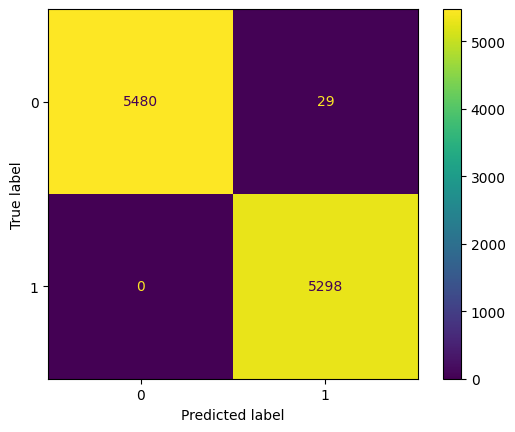

Classification Report:
              precision    recall  f1-score   support

      Galaxy       1.00      0.99      1.00      5509
        Star       0.99      1.00      1.00      5298

    accuracy                           1.00     10807
   macro avg       1.00      1.00      1.00     10807
weighted avg       1.00      1.00      1.00     10807

----------------------
Current running model: KNeighborsClassifier()
Score: 0.7404460072175442
Cross Validation Scores: [0.67730743 0.70240574 0.70410642 0.68270677 0.69705032]
Confusion Matrix:


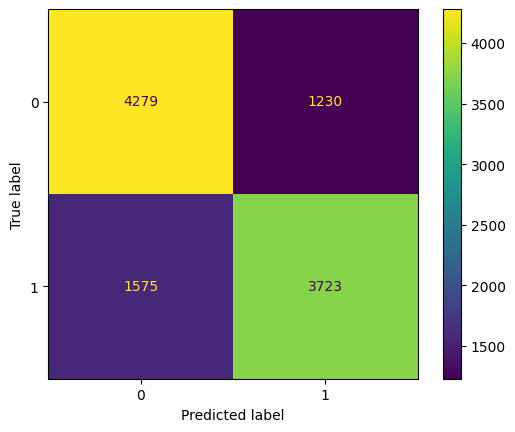

Classification Report:
              precision    recall  f1-score   support

      Galaxy       0.73      0.78      0.75      5509
        Star       0.75      0.70      0.73      5298

    accuracy                           0.74     10807
   macro avg       0.74      0.74      0.74     10807
weighted avg       0.74      0.74      0.74     10807

----------------------
Current running model: LogisticRegression()
Score: 0.5843434810770797
Cross Validation Scores: [0.57240342 0.59275966 0.57339503 0.59410064 0.60161943]
Confusion Matrix:


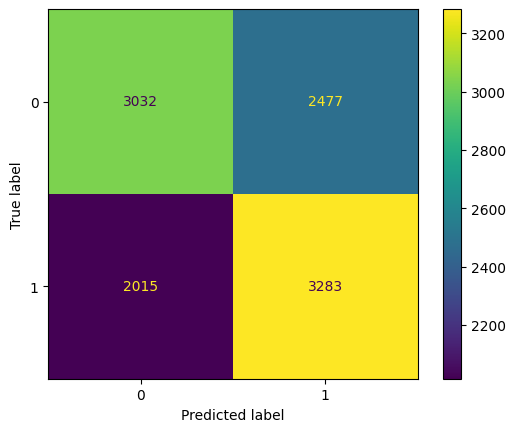

Classification Report:
              precision    recall  f1-score   support

      Galaxy       0.60      0.55      0.57      5509
        Star       0.57      0.62      0.59      5298

    accuracy                           0.58     10807
   macro avg       0.59      0.59      0.58     10807
weighted avg       0.59      0.58      0.58     10807

----------------------


In [189]:
nb = GaussianNB()
# svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()

models = [nb, dtc, rf, knn, logreg]

X = celestial_data.drop(columns = ['class'], axis = 1)
y = celestial_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rus = RandomUnderSampler()
smote = SMOTE()

x_train, y_train = rus.fit_resample(x_train, y_train)
x_train, y_train = smote.fit_resample(x_train, y_train)

accuracies = []

for model in models:
    print(f'Current running model: {model}')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    accuracies.append(score)
    print(f'Score: {score}')
    print(f'Cross Validation Scores: {cross_val_score(estimator = model, X = X, y = y)}')
    print(f'Confusion Matrix:')
    cf = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cf).plot()
    plt.show()
    print('Classification Report:')
    print(classification_report(y_test, pred, target_names = ['Galaxy', 'Star']))
    print('----------------------')

([<matplotlib.axis.XTick at 0x7fad59a6ced0>,
 [Text(0, 0, 'NB'),
  Text(1, 0, 'DT'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'LGR')])

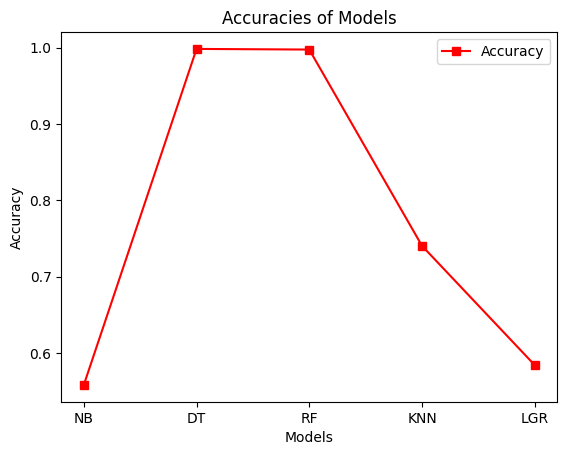

In [190]:
plt.plot(accuracies, marker = 's', color = 'red')
plt.title('Accuracies of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['NB', 'DT', 'RF', 'KNN', 'LGR'])